In [1]:
import pandas as pd
from pathlib import Path
csvpath = Path('../Resources/nasdaq.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
%matplotlib inline

In [2]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2012-01-03,25.030001,25.270000,24.910000,24.959999,21.894108,1468800,0.018360
2012-01-04,24.690001,24.799999,24.430000,24.620001,21.595875,1100900,-0.013622
2012-01-05,24.360001,24.719999,24.139999,24.660000,21.630962,1072200,0.001625
2012-01-06,24.629999,24.900000,24.379999,24.430000,21.429213,1192400,-0.009327
2012-01-09,24.410000,24.660000,24.270000,24.330000,21.341490,863900,-0.004093


<AxesSubplot:xlabel='Date'>

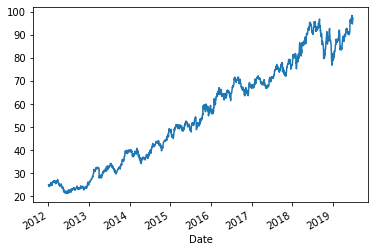

In [3]:
# The series is non-stationary (Trends upwards)
df.Close.plot()

In [4]:
# Transform into a stationary process
df['Return'] = df['Close'].pct_change()
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2012-01-04,24.690001,24.799999,24.430000,24.620001,21.595875,1100900,-0.013622
2012-01-05,24.360001,24.719999,24.139999,24.660000,21.630962,1072200,0.001625
2012-01-06,24.629999,24.900000,24.379999,24.430000,21.429213,1192400,-0.009327
2012-01-09,24.410000,24.660000,24.270000,24.330000,21.341490,863900,-0.004093
2012-01-10,24.580000,25.250000,24.490000,25.170000,22.078316,2647200,0.034525


In [5]:
# Select only the returns
returns = df.loc[:, 'Return']

<AxesSubplot:xlabel='Date'>

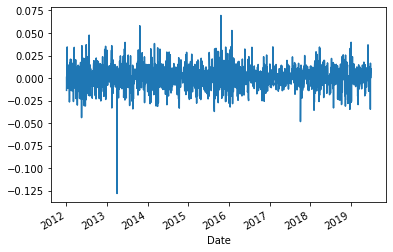

In [6]:
# Stationarity now seen
returns.plot()

# ARMA Model

In [7]:
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA

In [8]:
# Create the ARMA model using the return values and the order
# For the order parameter, the first 1 indicates the number of AR lags
# For the order parameter, the second 1 indicates the number of MA lags
model = ARMA(returns.values, order=(1,1))

/Users/enriquebriceno/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [9]:
# Fit the model to the data
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.96083D+00    |proj g|=  8.93513D-02

At iterate    5    f= -2.96083D+00    |proj g|=  8.02083D-03

At iterate   10    f= -2.96083D+00    |proj g|=  8.35696D-03

At iterate   15    f= -2.96083D+00    |proj g|=  4.91474D-03

At iterate   20    f= -2.96086D+00    |proj g|=  6.48432D-02

At iterate   25    f= -2.96090D+00    |proj g|=  1.13163D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     38      1     0     0   

 This problem is unconstrained.


<AxesSubplot:title={'center':'Stock Return Forecast'}>

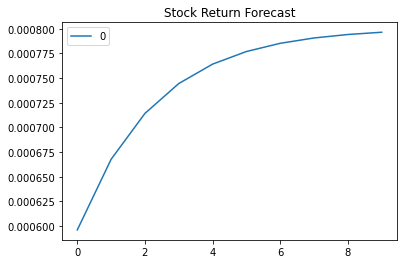

In [10]:
# Plot the forecasted return for the next 10 days
pd.DataFrame(results.forecast(steps=10)[0]).plot(title="Stock Return Forecast")

In [11]:
# Summarize the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1884
Model:                     ARMA(1, 1)   Log Likelihood                5578.344
Method:                       css-mle   S.D. of innovations              0.013
Date:                Mon, 14 Feb 2022   AIC                         -11148.689
Time:                        19:13:26   BIC                         -11126.524
Sample:                             0   HQIC                        -11140.526
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.000      3.040      0.002       0.000       0.001
ar.L1.y        0.6503      0.258      2.516      0.012       0.144       1.157
ma.L1.y       -0.6808      0.249     -2.735      0.006      -1.169      -0.193
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5378           +0.0000j            1.5378            0.0000
MA.1            1.4688           +0.0000j            1.4688            0.0000
-----------------------------------------------------------------------------
"""